# 1. Linear Regression

## 1.1 Understanding the data

### 0. Import libraries



In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Load the dataset


In [209]:
data = pd.read_csv("climate_change.csv")
data

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


### 2. Take a look at some samples of your dataset


In [210]:
data.sample(5)

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
79,1989,12,0.142,352.84,1730.61,308.558,259.472,475.630,1366.8784,0.0054,0.181
228,2002,5,0.778,375.65,1778.81,316.806,259.153,543.053,1366.6470,0.0019,0.432
188,1999,1,-1.149,368.12,1796.25,314.589,266.016,538.872,1366.4773,0.0022,0.366
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
68,1989,1,-1.166,352.89,1721.48,307.609,252.554,459.549,1366.5409,0.0072,0.019


### 3. How many sample are there in the dataset?

#### **Answer** : 308 samples and 11 features

In [211]:
data.shape

(308, 11)

### 4. Average temperature is under the heading ’Temp’. What is the mean value of Temp? How about the mean values of CO2, NO2 and CH4?


In [212]:
data.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


#### **Answer** :

In [213]:
data.describe().loc["mean"]

Year        1995.662338
Month          6.551948
MEI            0.275555
CO2          363.226753
CH4         1749.824513
N2O          312.391834
CFC-11       251.973068
CFC-12       497.524782
TSI         1366.070759
Aerosols       0.016657
Temp           0.256776
Name: mean, dtype: float64

### 5. How spread out are the Temp values from the mean of Temp? (this measure is called standard deviation (std))


In [214]:
data.std()

Year         7.423197
Month        3.447214
MEI          0.937918
CO2         12.647125
CH4         46.051678
N2O          5.225131
CFC-11      20.231783
CFC-12      57.826899
TSI          0.399610
Aerosols     0.029050
Temp         0.179090
dtype: float64

#### **Answer** :

In [215]:
data.std().Temp

0.17908976824102688

### 6. Which variables have more linear relationship with the Temp variable?

#### **Answer** : Year

In [216]:
data.corr()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
Year,1.000000,-0.025789,-0.145345,0.985379,0.910563,0.994850,0.460965,0.870067,0.022353,-0.361884,0.755731
Month,-0.025789,1.000000,-0.016345,-0.096287,0.017558,0.012395,-0.014914,-0.001084,-0.032754,0.014845,-0.098016
MEI,-0.145345,-0.016345,1.000000,-0.152911,-0.105555,-0.162375,0.088171,-0.039836,-0.076826,0.352351,0.135292
CO2,0.985379,-0.096287,-0.152911,1.000000,0.872253,0.981135,0.401284,0.823210,0.017867,-0.369265,0.748505
CH4,0.910563,0.017558,-0.105555,0.872253,1.000000,0.894409,0.713504,0.958237,0.146335,-0.290381,0.699697
N2O,0.994850,0.012395,-0.162375,0.981135,0.894409,1.000000,0.412155,0.839295,0.039892,-0.353499,0.743242
CFC-11,0.460965,-0.014914,0.088171,0.401284,0.713504,0.412155,1.000000,0.831381,0.284629,-0.032302,0.380111
CFC-12,0.870067,-0.001084,-0.039836,0.823210,0.958237,0.839295,0.831381,1.000000,0.189270,-0.243785,0.688944
TSI,0.022353,-0.032754,-0.076826,0.017867,0.146335,0.039892,0.284629,0.189270,1.000000,0.083238,0.182186
Aerosols,-0.361884,0.014845,0.352351,-0.369265,-0.290381,-0.353499,-0.032302,-0.243785,0.083238,1.000000,-0.392069


### 7. Plot data samples with CO2 values on the x axis and Temp on the y axis. Does temperature increase as CO2 increases?


#### **Answer** : Yes, based on the plot for most cases when CO2 increases it cause to increase Temperature

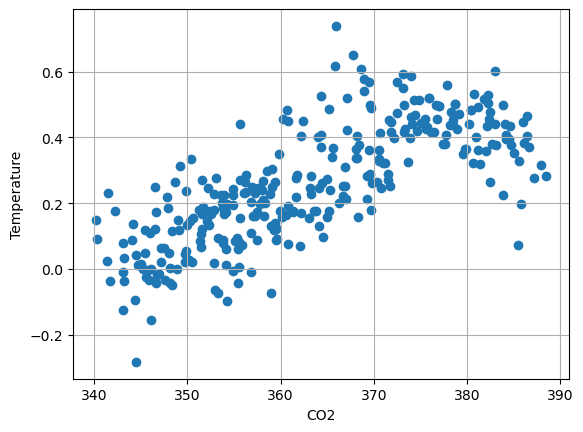

In [217]:
plt.scatter(data.CO2, data.Temp)
plt.xlabel("CO2")
plt.ylabel("Temperature")
plt.grid()
plt.show()

## 1.2 Creating our model: simple linear regression

### 1. Spliting data into training set and test set

In [218]:
training_set = data[data.Year <= 2003]
test_set = data[data.Year > 2003]

### 2. How many training and test samples do you have?
#### **Answer :**

In [219]:
print(training_set.shape)
print(test_set.shape)

(248, 11)
(60, 11)


### 3. Simple Regression

In [220]:
training_set = training_set[["CO2", "Temp"]]
test_set = test_set[["CO2", "Temp"]]

In [221]:
training_set

,CO2,Temp
0,345.96,0.109
1,345.52,0.118
2,344.15,0.137
3,342.25,0.176
4,340.17,0.149
...,...,...
243,374.32,0.514
244,373.20,0.499
245,373.10,0.550
246,374.64,0.419


### 4. Separate training and test sets into feature X (CO2) and label y (Temp).

In [222]:
X_train, Y_train = training_set['CO2'].values, training_set['Temp'].values
X_test, Y_test = test_set["CO2"].values, test_set["Temp"].values

In [223]:
X_train

array([345.96, 345.52, 344.15, 342.25, 340.17, 340.3 , 341.53, 343.07,
       344.05, 344.77, 345.46, 346.77, 347.55, 346.98, 345.55, 343.2 ,
       341.35, 341.68, 343.06, 344.54, 345.25, 346.06, 347.66, 348.2 ,
       348.92, 348.4 , 346.66, 344.85, 343.2 , 343.08, 344.4 , 345.82,
       346.54, 347.13, 348.05, 349.77, 350.53, 349.9 , 348.11, 346.09,
       345.01, 344.47, 345.86, 347.15, 348.38, 348.7 , 349.72, 351.32,
       352.14, 351.61, 349.91, 347.84, 346.52, 346.65, 347.96, 349.18,
       350.38, 351.68, 352.24, 353.66, 354.18, 353.68, 352.58, 350.66,
       349.03, 349.08, 350.15, 351.44, 352.89, 353.24, 353.8 , 355.59,
       355.89, 355.3 , 353.98, 351.53, 350.02, 350.29, 351.44, 352.84,
       353.79, 354.88, 355.65, 356.28, 357.29, 356.32, 354.89, 352.89,
       351.28, 351.59, 353.05, 354.27, 354.87, 355.68, 357.06, 358.51,
       359.09, 358.1 , 356.12, 353.89, 352.3 , 352.32, 353.79, 355.07,
       356.17, 356.93, 357.82, 359.  , 359.55, 359.32, 356.85, 354.91,
      

In [224]:
Y_train

array([ 0.109,  0.118,  0.137,  0.176,  0.149,  0.093,  0.232,  0.078,
        0.089,  0.013,  0.049, -0.019,  0.065, -0.016, -0.024,  0.034,
        0.025, -0.035, -0.123, -0.282, -0.001, -0.155, -0.032, -0.042,
        0.001, -0.049, -0.042,  0.013, -0.035, -0.008, -0.093, -0.002,
        0.121,  0.065,  0.049,  0.045,  0.023,  0.055,  0.004, -0.001,
        0.016,  0.043, -0.033,  0.022,  0.116,  0.266,  0.021,  0.084,
        0.145,  0.121,  0.238,  0.219,  0.25 ,  0.174,  0.186,  0.314,
        0.334,  0.189,  0.248,  0.224,  0.175,  0.2  ,  0.168,  0.154,
        0.149,  0.12 ,  0.027,  0.106,  0.019,  0.094,  0.088,  0.083,
        0.073,  0.094,  0.167,  0.168,  0.135,  0.145,  0.067,  0.181,
        0.187,  0.242,  0.442,  0.285,  0.231,  0.233,  0.196,  0.227,
        0.179,  0.271,  0.278,  0.199,  0.224,  0.272,  0.161,  0.299,
        0.249,  0.269,  0.271,  0.225,  0.176,  0.133,  0.079,  0.084,
        0.266,  0.25 ,  0.199,  0.132,  0.125,  0.118, -0.008, -0.007,
      

In [225]:
X_test

array([377.  , 377.87, 378.73, 380.41, 380.63, 379.56, 377.61, 376.15,
       374.11, 374.44, 375.93, 377.45, 378.47, 379.76, 381.14, 382.2 ,
       382.47, 382.2 , 380.78, 378.73, 376.66, 376.98, 378.29, 379.92,
       381.35, 382.16, 382.66, 384.73, 384.98, 384.09, 382.38, 380.45,
       378.92, 379.16, 380.18, 381.79, 382.93, 383.81, 384.56, 386.4 ,
       386.58, 386.05, 384.49, 382.  , 380.9 , 381.14, 382.42, 383.89,
       385.44, 385.73, 385.97, 387.16, 388.5 , 387.88, 386.42, 384.15,
       383.09, 382.99, 384.13, 385.56])

In [226]:
Y_test

array([0.496, 0.56 , 0.501, 0.484, 0.323, 0.35 , 0.38 , 0.418, 0.442,
       0.468, 0.521, 0.381, 0.452, 0.364, 0.493, 0.53 , 0.476, 0.506,
       0.532, 0.502, 0.498, 0.495, 0.478, 0.366, 0.32 , 0.435, 0.38 ,
       0.378, 0.352, 0.442, 0.456, 0.482, 0.425, 0.472, 0.44 , 0.518,
       0.601, 0.498, 0.435, 0.466, 0.372, 0.382, 0.394, 0.358, 0.402,
       0.362, 0.266, 0.226, 0.074, 0.198, 0.447, 0.278, 0.283, 0.315,
       0.406, 0.407, 0.378, 0.44 , 0.394, 0.33 ])

### 5. Normalize data

In [227]:
mean_CO2 = np.mean(X_train)
std_CO2 = np.std(X_train)
X_train_normalized = (X_train - mean_CO2) / std_CO2
X_test_normalized = (X_test - mean_CO2) / std_CO2
print(X_train_normalized.std())
print(X_train_normalized.mean())

0.9999999999999999
3.4381100117424204e-15


In [228]:
bias_column = np.ones(X_train.shape[0])
X_train_with_bias = np.column_stack((bias_column, X_train_normalized))
bias_column = np.ones(X_test.shape[0])
X_test_with_bias = np.column_stack((bias_column, X_test_normalized))

### 6. Implementing

In [229]:
def linear_regression_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    X_b = np.c_[np.ones((len(X), 1)), X]

    theta = np.zeros(X_b.shape[1])
    cost_history = []

    for _ in range(n_iterations):
        predictions = X_b.dot(theta)

        errors = predictions - y

        gradients = 2 / len(X) * X_b.T.dot(errors)

        theta = theta - learning_rate * gradients
        mse = mean_squared_error(predictions, y)
        cost_history.append(mse)

    return theta, cost_history


def linear_regression_stochastic_gradient_descent(
    X, y, learning_rate=0.01, n_iterations=1000
):
    X_b = np.c_[np.ones((len(X), 1)), X]

    theta = np.zeros(X_b.shape[1])
    cost_history = []

    for _ in range(n_iterations):
        for _ in range(len(X)):
            random_index = np.random.randint(len(X))
            xi = X_b[random_index : random_index + 1]
            yi = y[random_index : random_index + 1]

            prediction = xi.dot(theta)
            error = prediction - yi

            gradients = 2 * xi.T.dot(error)

            theta = theta - learning_rate * gradients

        predictions = X_b.dot(theta)
        mse = mean_squared_error(predictions, y)
        cost_history.append(mse)

    return theta, cost_history


def mean_squared_error(y_pred, y_actual):
    m = len(y_actual)  # Number of training examples
    mse = np.sum((y_pred - y_actual) ** 2) / (2 * m)
    return mse

#### 6.1 Implement linear regression from scratch using the gradient descent algorithm

##### algorithem

In [230]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]  # differents learning rates
iterations = [100, 350, 500, 1000]  # differents iterations

best_m = None
best_b = None
best_itr = None
best_lr = None
best_cost = float("inf")
best_cost_data = []
best_theta = np.zeros(X_train_with_bias.shape[1])
for lr in learning_rates:
    for iter in iterations:
        theta, cost_data = linear_regression_gradient_descent(
            X_train_normalized, Y_train, lr, iter
        )

        if cost_data[-1] < best_cost:
            best_theta = theta.copy()
            best_itr = iter
            best_lr = lr
            best_cost = cost_data[-1]
            best_cost_data = cost_data.copy()


print("Best interception and slope:", best_theta[0], theta[1])
print("Best learning rate:", best_lr)
print("Best number of iterations:", best_itr)
print("Best cost:", best_cost)

Best interception and slope: 0.21878629027801266 0.0237737016292948
Best learning rate: 0.1
Best number of iterations: 100
Best cost: 0.006509206198334206


### Plot cost function

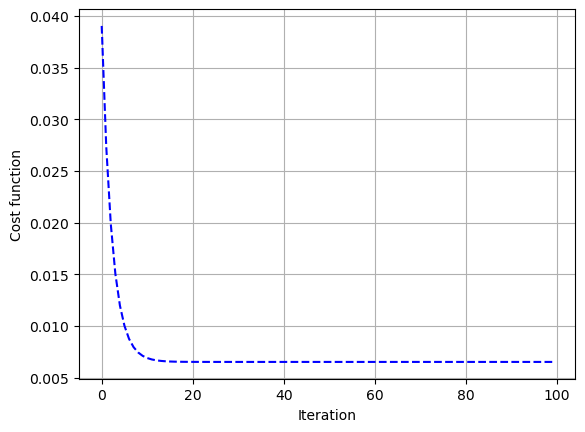

In [231]:
plt.plot(range(best_itr),best_cost_data, color="b", linestyle='--')
plt.xlabel("Iteration")
plt.ylabel("Cost function")
plt.grid()
plt.show()

#### MSE

In [232]:
predict_cost_train = mean_squared_error(X_train_with_bias @ best_theta, Y_train)
predict_cost_test = mean_squared_error(X_test_with_bias @ best_theta, Y_test)

print(f"MSE Train :{predict_cost_train} , MSE Test:{predict_cost_test}")

MSE Train :0.006509206198334206 , MSE Test:0.014298656330369003


#### Regression Line

In [233]:
regression_line_train = X_train_with_bias @ best_theta
regression_line_test = X_test_with_bias @ best_theta

#### Plot

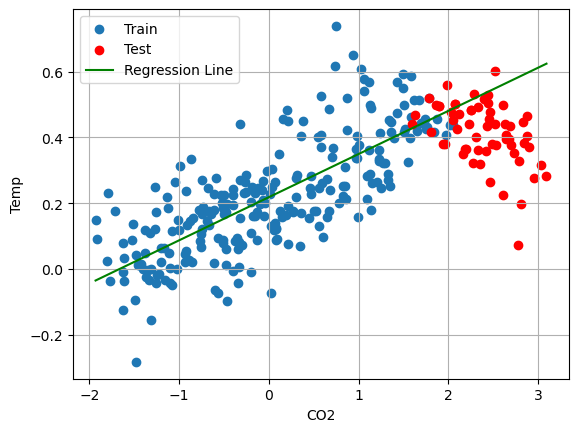

In [234]:
plt.scatter(X_train_normalized, Y_train)
plt.scatter(X_test_normalized, Y_test,color="r")
plt.plot([min(X_train_normalized), max(X_test_normalized)], [regression_line_train.min(), regression_line_test.max()], color='green')  # regression line
plt.xlabel("CO2")
plt.ylabel("Temp")
plt.legend(["Train","Test","Regression Line"])
plt.grid()
plt.show()

#### 6.8 Implement linear regression from scratch using the closed form solution

In [235]:
theta = np.linalg.inv(X_train_with_bias.T @ X_train_with_bias) @ X_train_with_bias.T @ Y_train

#### Report parameters

In [236]:
theta

array([0.21878629, 0.13113948])

#### Regression Line

In [237]:
regression_line_train = X_train_with_bias @ theta
regression_line_test = X_test_with_bias @ theta

#### MSE

In [238]:
predict_cost_train = mean_squared_error(X_train_with_bias @ theta, Y_train)


predict_cost_test = mean_squared_error(X_test_with_bias @ theta, Y_test)


print(f"MSE Train :{predict_cost_train} , MSE Test:{predict_cost_test}")

MSE Train :0.006509206198334206 , MSE Test:0.01429865634398411


#### Plot

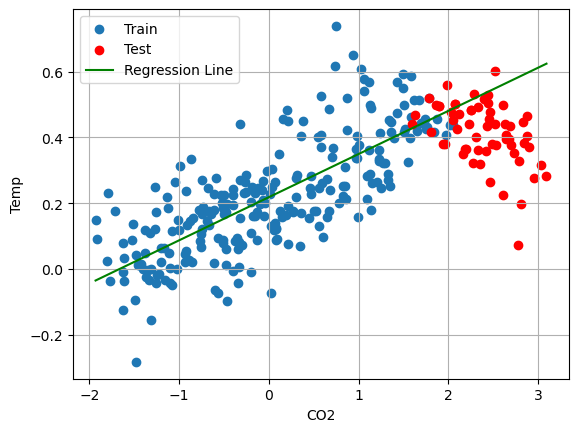

In [239]:
plt.scatter(X_train_normalized, Y_train)
plt.scatter(X_test_normalized, Y_test,color="r")
plt.plot([min(X_train_normalized), max(X_test_normalized)], [regression_line_train.min(), regression_line_test.max()], color='green')  # regression line
plt.xlabel("CO2")
plt.ylabel("Temp")
plt.legend(["Train","Test","Regression Line"])
plt.grid()
plt.show()